## Group 2 
##Member Name - Smeet Kathiria

In [ ]:
!pip install scikit-plot

In [ ]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### EDA & DATA Cleaning

In [ ]:
diabetes_data = pd.read_csv("diabetes.csv") # Reading the Data
diabetes_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

It seems that there are no missing values in our data. Great, let's see the distribution of data:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

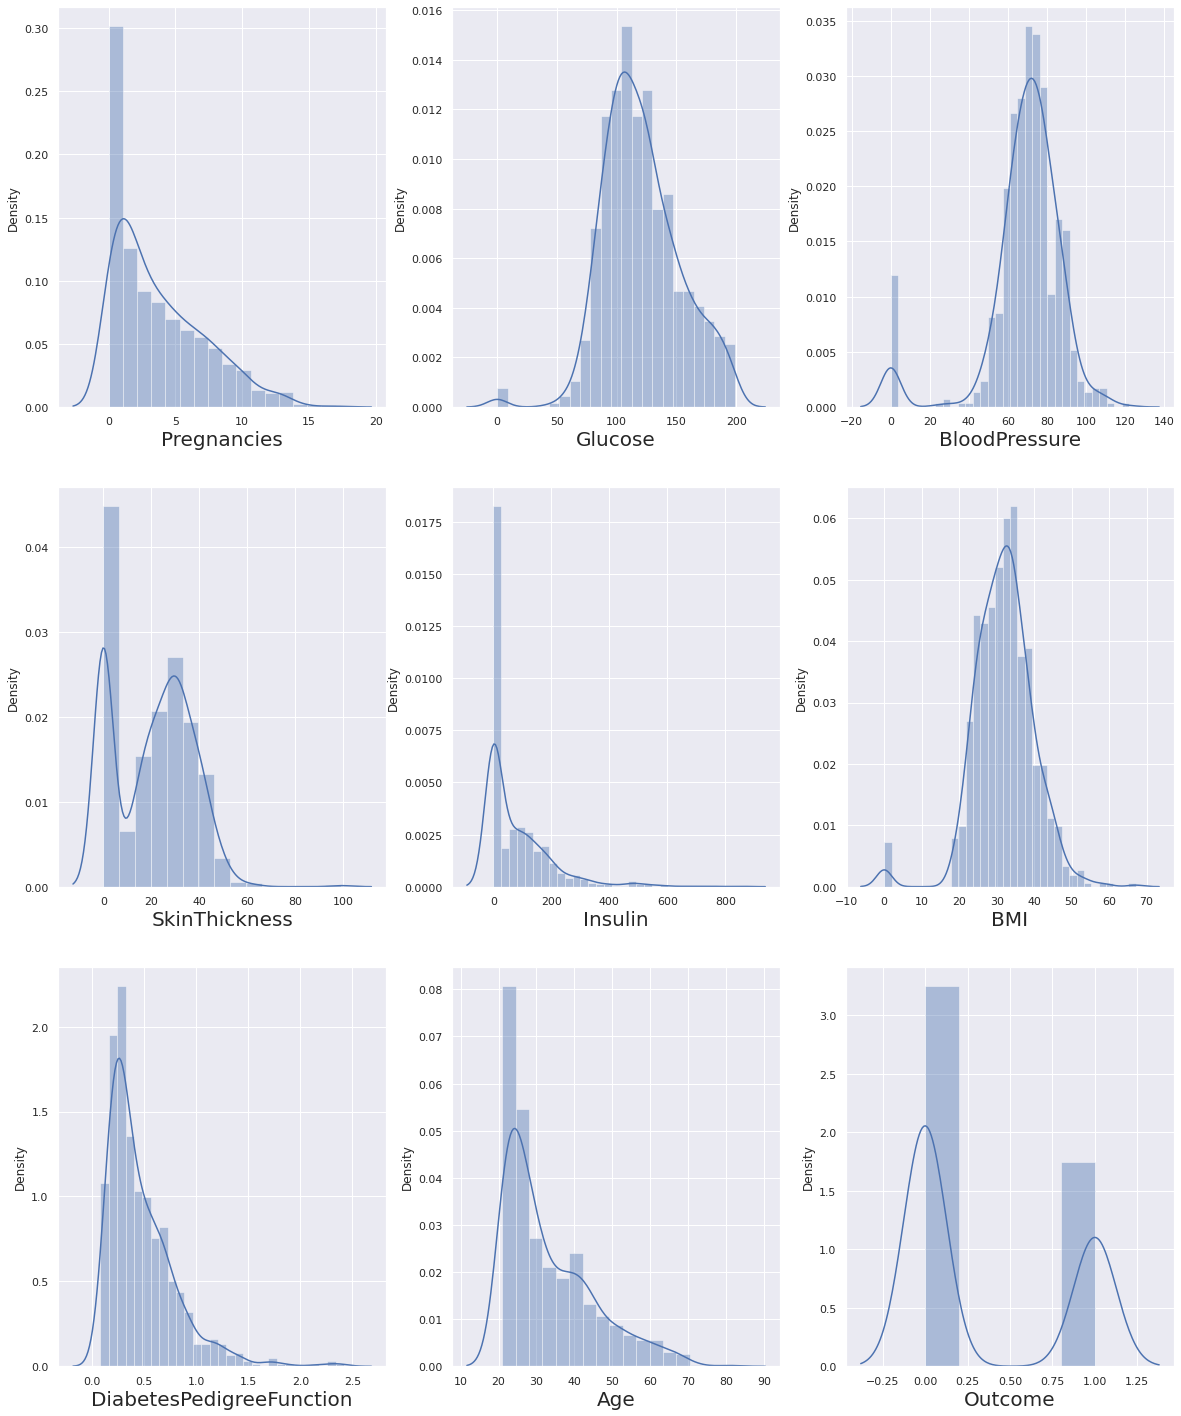

In [ ]:
# let's see how diabetes_data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in diabetes_data:
    if plotnumber<=9 :     # as there are 9 columns in the diabetes_data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes_data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

It is observed that there is some skewness in the data, let's fix that.

There is less data for columns like Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. We cannot have 0 values for these. Let's fix that. One approach is to remove such data or simply replace it with their respective mean values. Let's do the latter.


In [ ]:
# Here we replace zero values with the mean of the column
diabetes_data['BMI'] = diabetes_data['BMI'].replace(0,diabetes_data['BMI'].mean())
diabetes_data['BloodPressure'] = diabetes_data['BloodPressure'].replace(0,diabetes_data['BloodPressure'].mean())
diabetes_data['Glucose'] = diabetes_data['Glucose'].replace(0,diabetes_data['Glucose'].mean())
diabetes_data['Insulin'] = diabetes_data['Insulin'].replace(0,diabetes_data['Insulin'].mean())
diabetes_data['SkinThickness'] = diabetes_data['SkinThickness'].replace(0,diabetes_data['SkinThickness'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

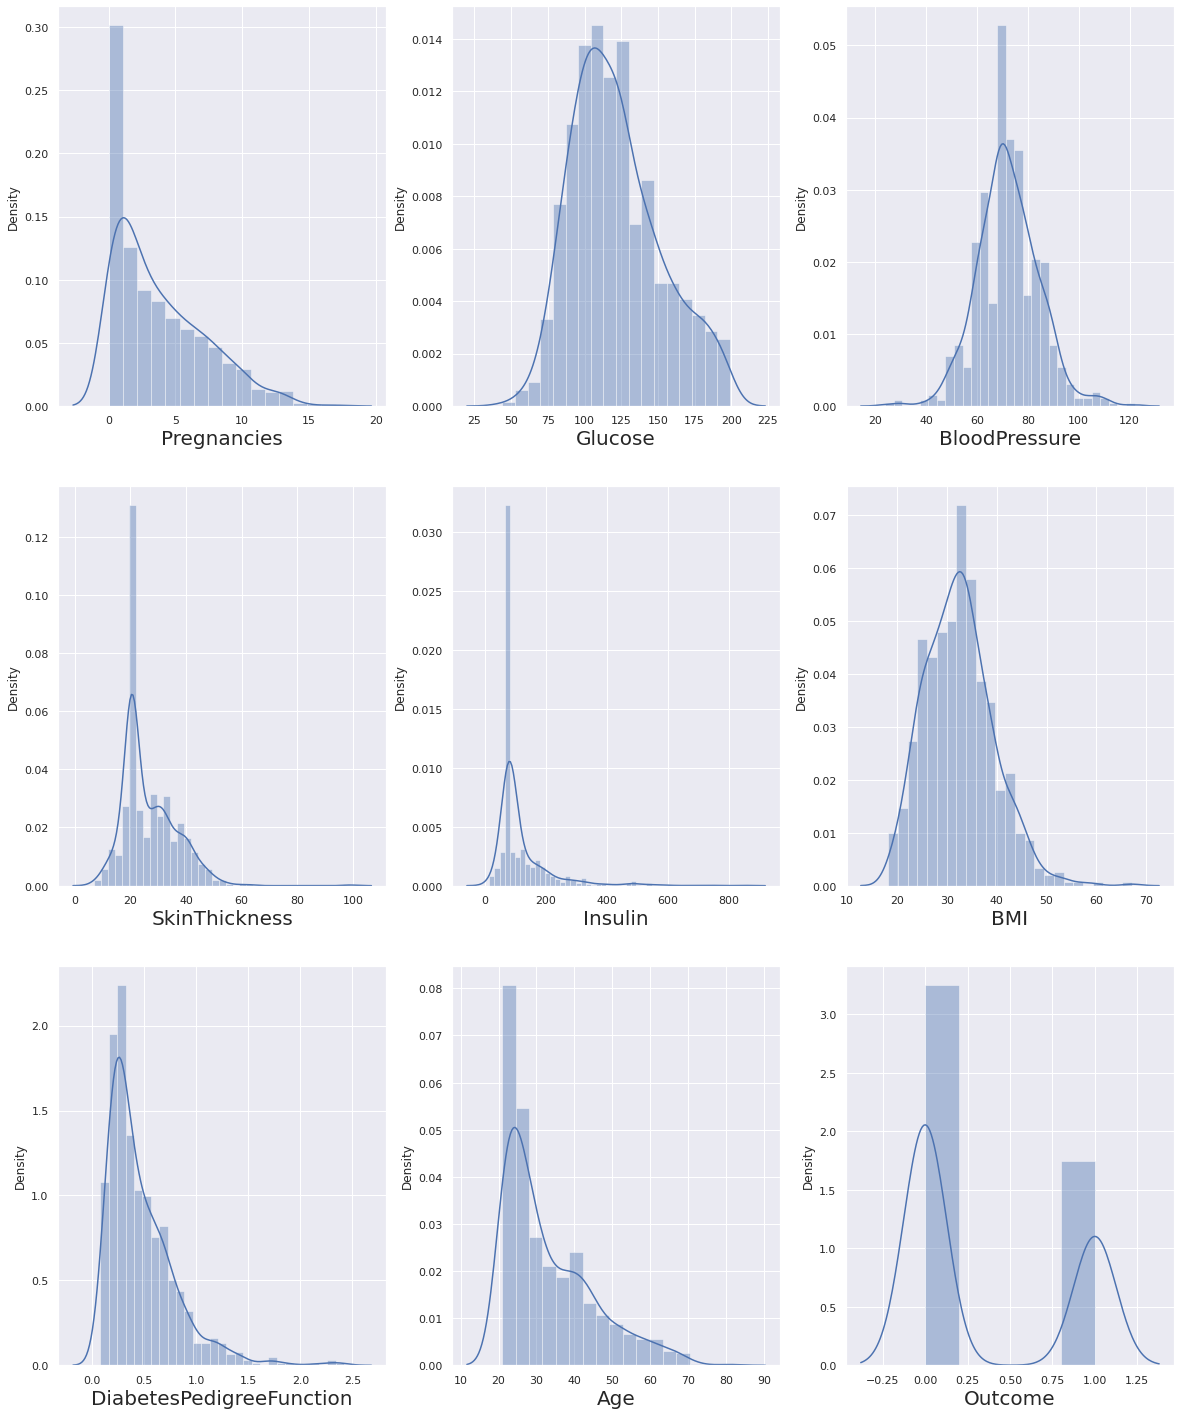

In [ ]:
# Lets visualize the distribution for diabetes data
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in diabetes_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(diabetes_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The issue of rows with 0 values have been fixed and data looks better. But, there still are outliers present in some columns.
Let's handle that.

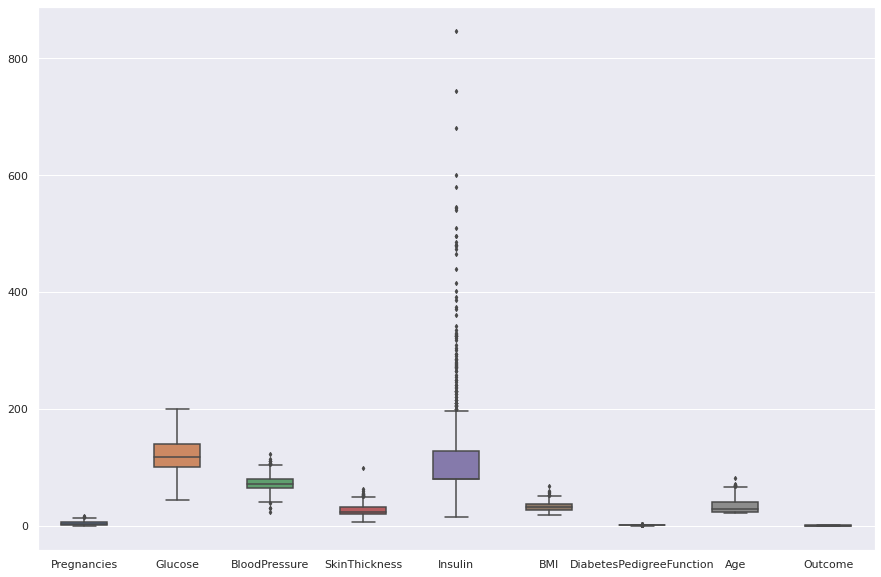

In [ ]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=diabetes_data, width= 0.5,ax=ax,  fliersize=3)


In [ ]:
quantile_data = diabetes_data['Pregnancies'].quantile(0.98)
# removing top 2% diabetes_data from the Pregnancies column
clean_data = diabetes_data[diabetes_data['Pregnancies']<quantile_data]
quantile_data = diabetes_data['BMI'].quantile(0.99)
# removing top 1% diabetes_data from the BMI column
clean_data  = diabetes_data[diabetes_data['BMI']<quantile_data]
quantile_data = diabetes_data['SkinThickness'].quantile(0.99)
# removing top 1% diabetes_data from the SkinThickness column
clean_data  = diabetes_data[diabetes_data['SkinThickness']<quantile_data]
quantile_data = diabetes_data['Insulin'].quantile(0.95)
# removing top 5% diabetes_data from the Insulin column
clean_data  = diabetes_data[diabetes_data['Insulin']<quantile_data]
quantile_data = diabetes_data['DiabetesPedigreeFunction'].quantile(0.99)
# removing top 1% diabetes_data from the DiabetesPedigreeFunction column
clean_data  = diabetes_data[diabetes_data['DiabetesPedigreeFunction']<quantile_data]
quantile_data = diabetes_data['Age'].quantile(0.99)
# removing top 1% diabetes_data from the Age column
clean_data  = diabetes_data[diabetes_data['Age']<quantile_data]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

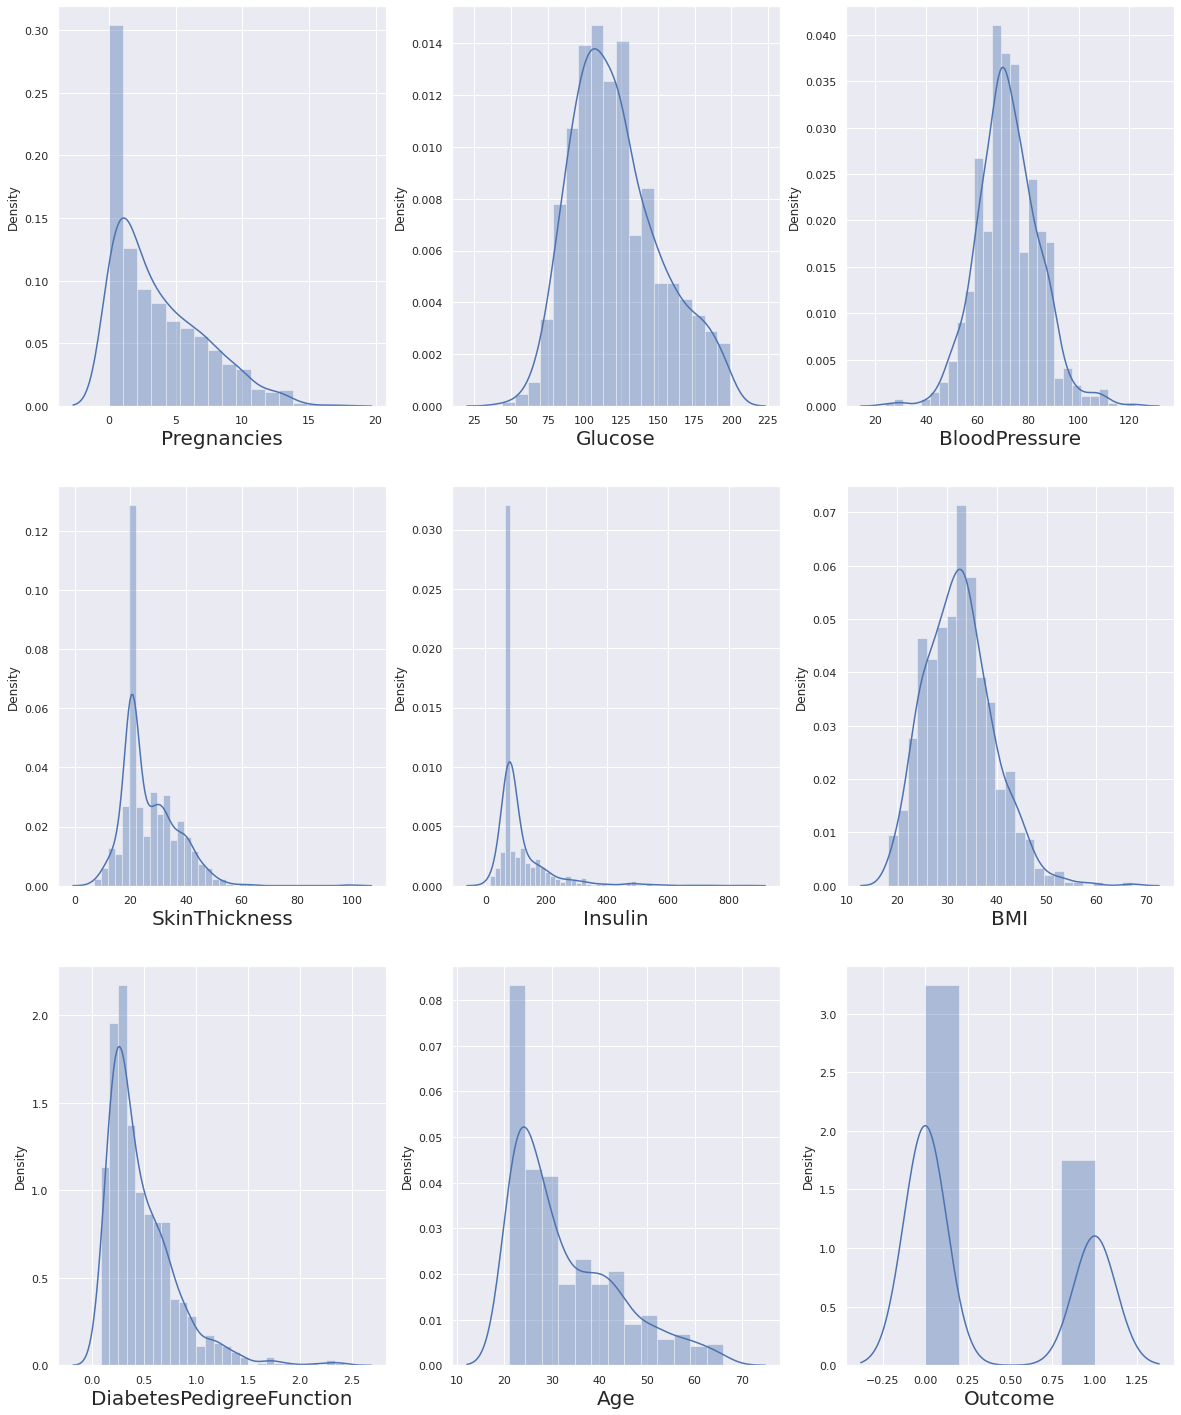

In [ ]:
# Visualzing data distribution for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in clean_data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(clean_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data now appears to be substantially better than previously. We'll begin our study with this data because we don't want to miss anything crucial.
We'll come back for extra preprocessing if our model doesn't work correctly.


In [ ]:
X = diabetes_data.drop(columns = ['Outcome'])
y = diabetes_data['Outcome']

Let's visualise the relationship between our independent variables and the categories before we fit our data to a model.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

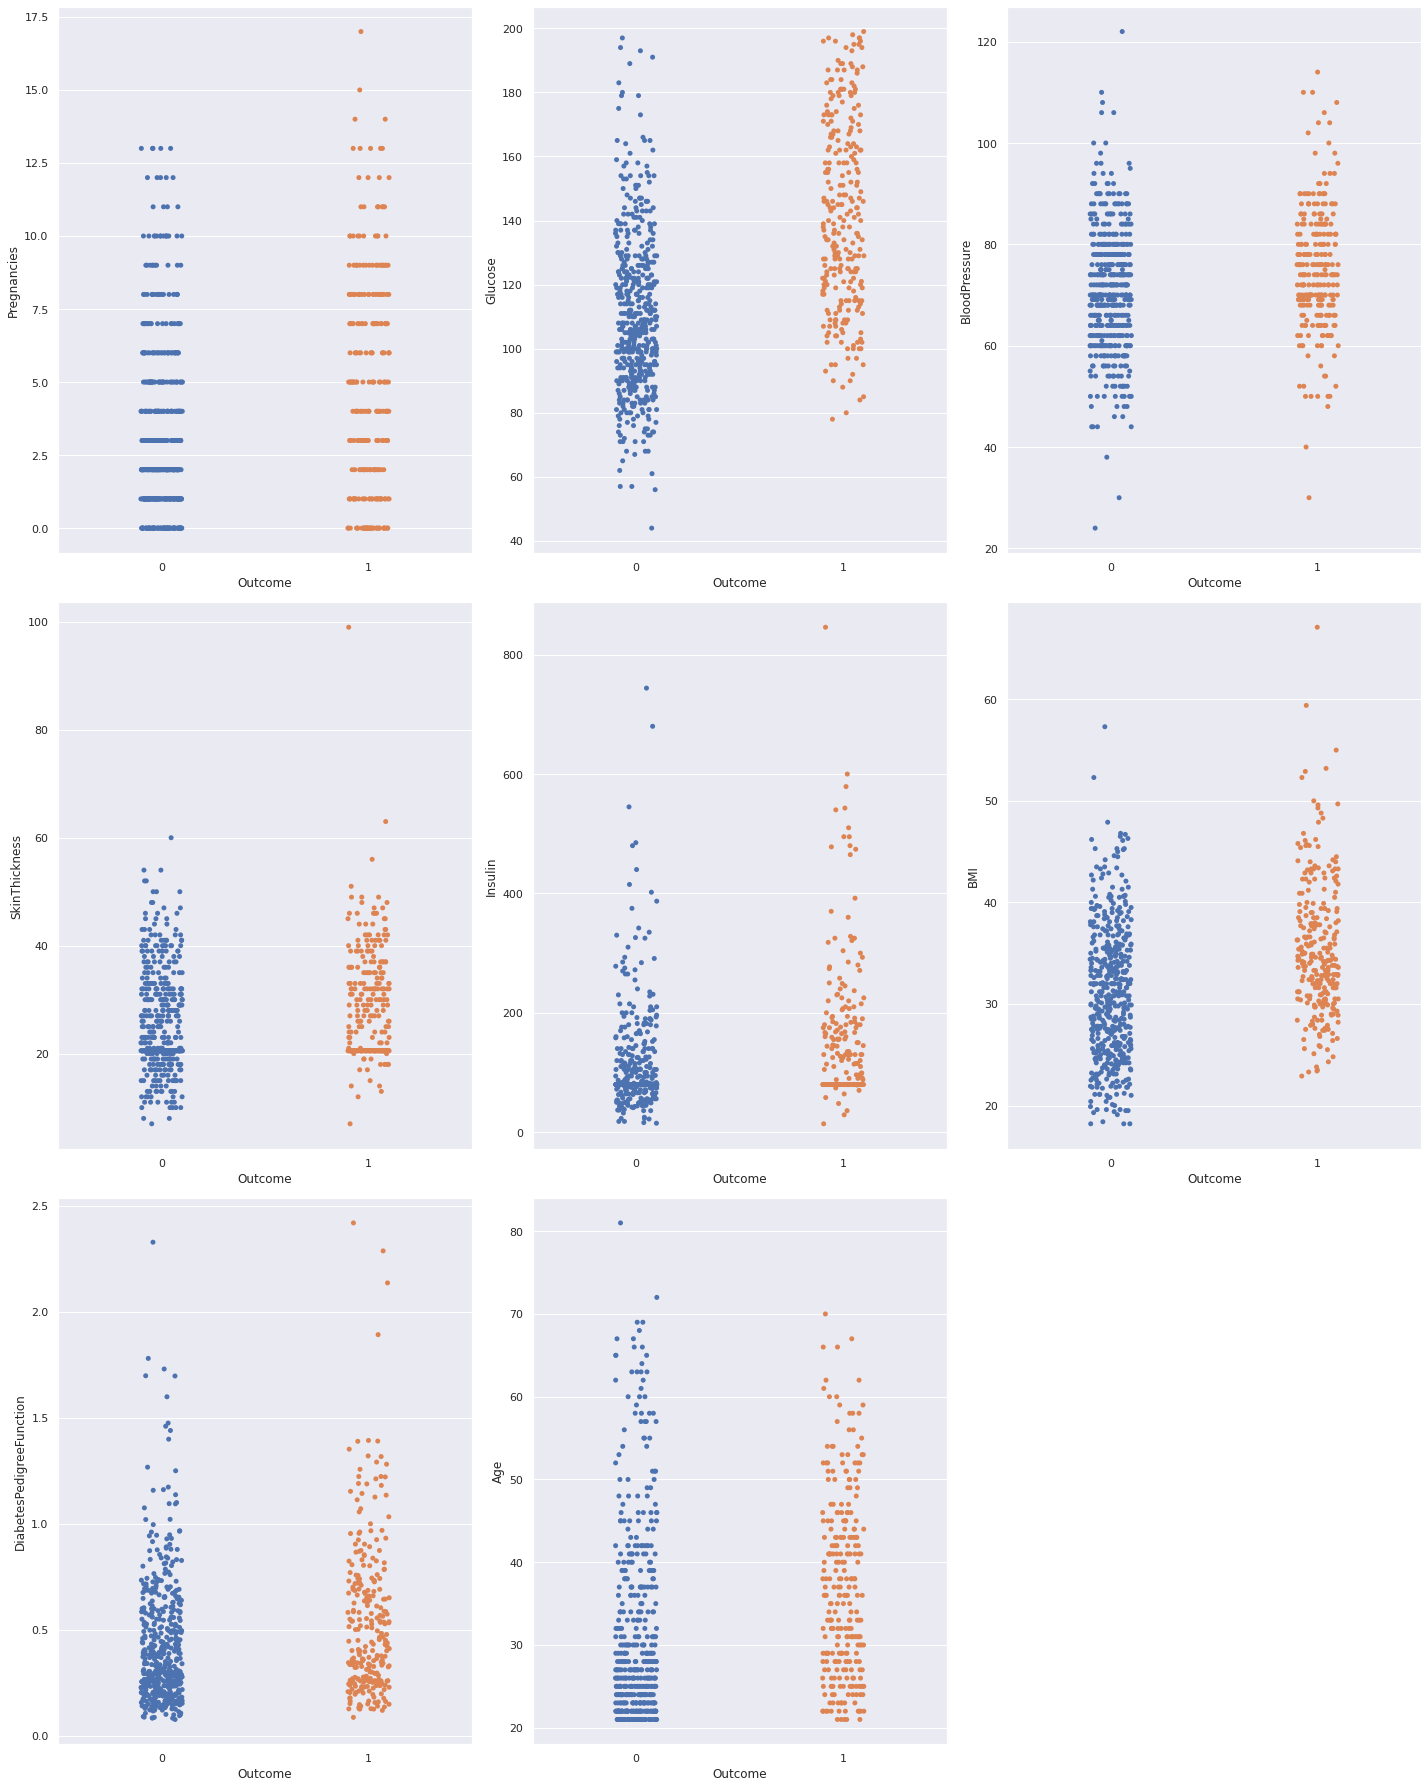

In [ ]:
# Visualzing data distribution for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

###### Pair plot for clean data

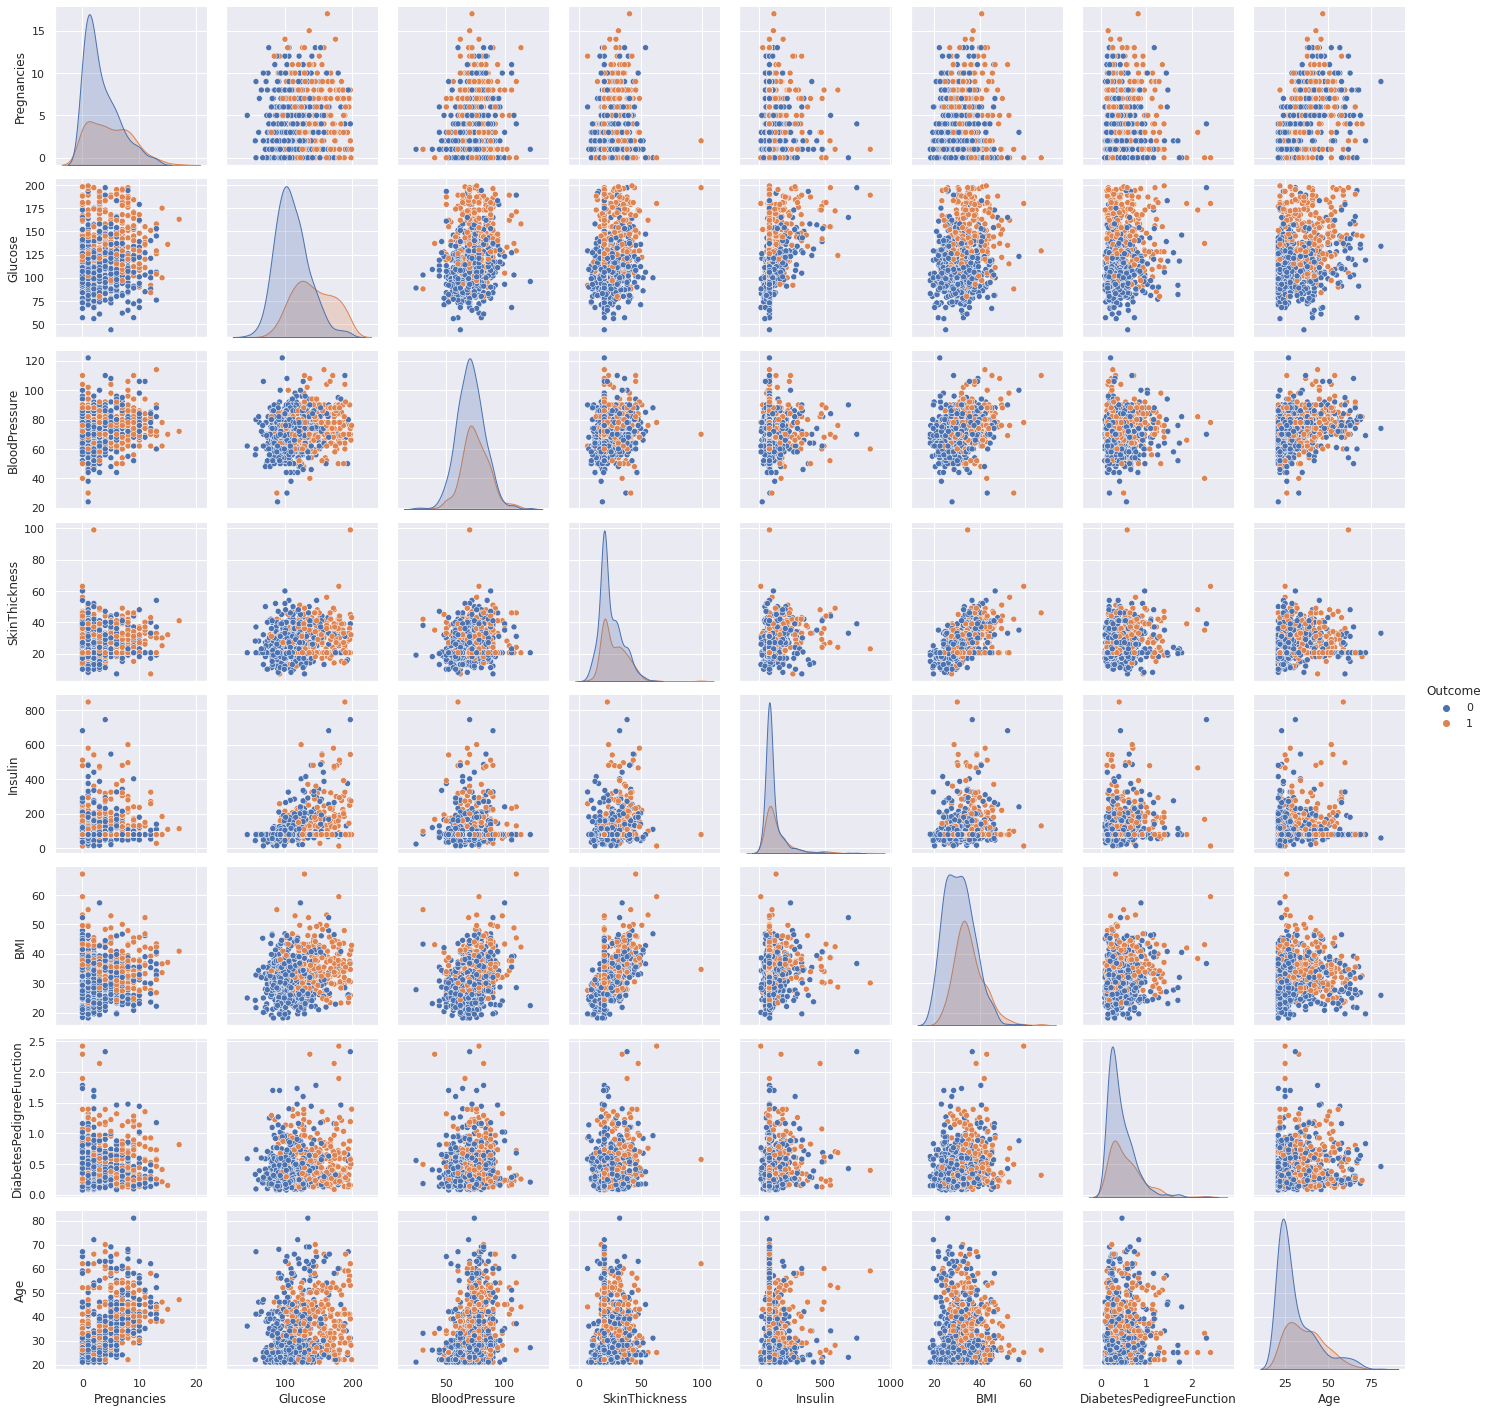

In [ ]:
p=sns.pairplot(diabetes_data, hue = 'Outcome')

##### Heatmap for clean data

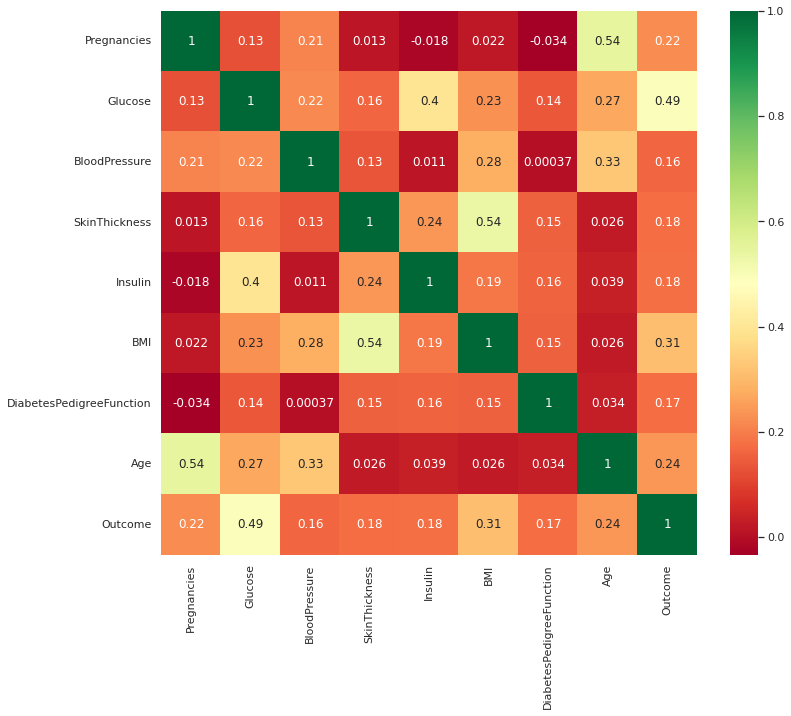

In [ ]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

Great!! Let's start by looking at the dependent variables for multicollinearity.
Prior to that, we need to scale our data. For that, we'll utilise the normal scaler.


In [ ]:
print("\nEDA on Diabetes Data Set \n")
print("#"*30)

print("\nFeatures/Columns : \n", X.columns)
print("\n\nNumber of Features/Columns : ", len(X.columns))
print("\nNumber of Rows : ",len(X))
print("\n\nData Types :\n", X.dtypes)

print("\n Contains NaN/Empty cells : ", X.isnull().values.any())

print("\n Total empty cells by column :\n", X.isnull().sum(), "\n\n")


EDA on Diabetes Data Set 

##############################

Features/Columns : 
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


Number of Features/Columns :  8

Number of Rows :  768


Data Types :
 Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

 Contains NaN/Empty cells :  False

 Total empty cells by column :
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64 




In [ ]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

This is how our data appears now that it has been scaled. Now we'll use VIF to check for multicollinearity (Variance Inflation factor)

In [ ]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check values
vif

vif                  Features
0  1.431075               Pregnancies
1  1.347308                   Glucose
2  1.247914             BloodPressure
3  1.450510             SkinThickness
4  1.262111                   Insulin
5  1.550227                       BMI
6  1.058104  DiabetesPedigreeFunction
7  1.605441                       Age

All of the VIF values are below 5 and extremely low. That means there will be no multicollinearity.
We can now go ahead and fit our data to the model.
Let's first divide our data into two sets: test and training.


#### Algorithm - Decision Tree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from IPython.display import Image  
import pydotplus
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [76]:
x_train,x_test,y_train,y_test3 = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [77]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

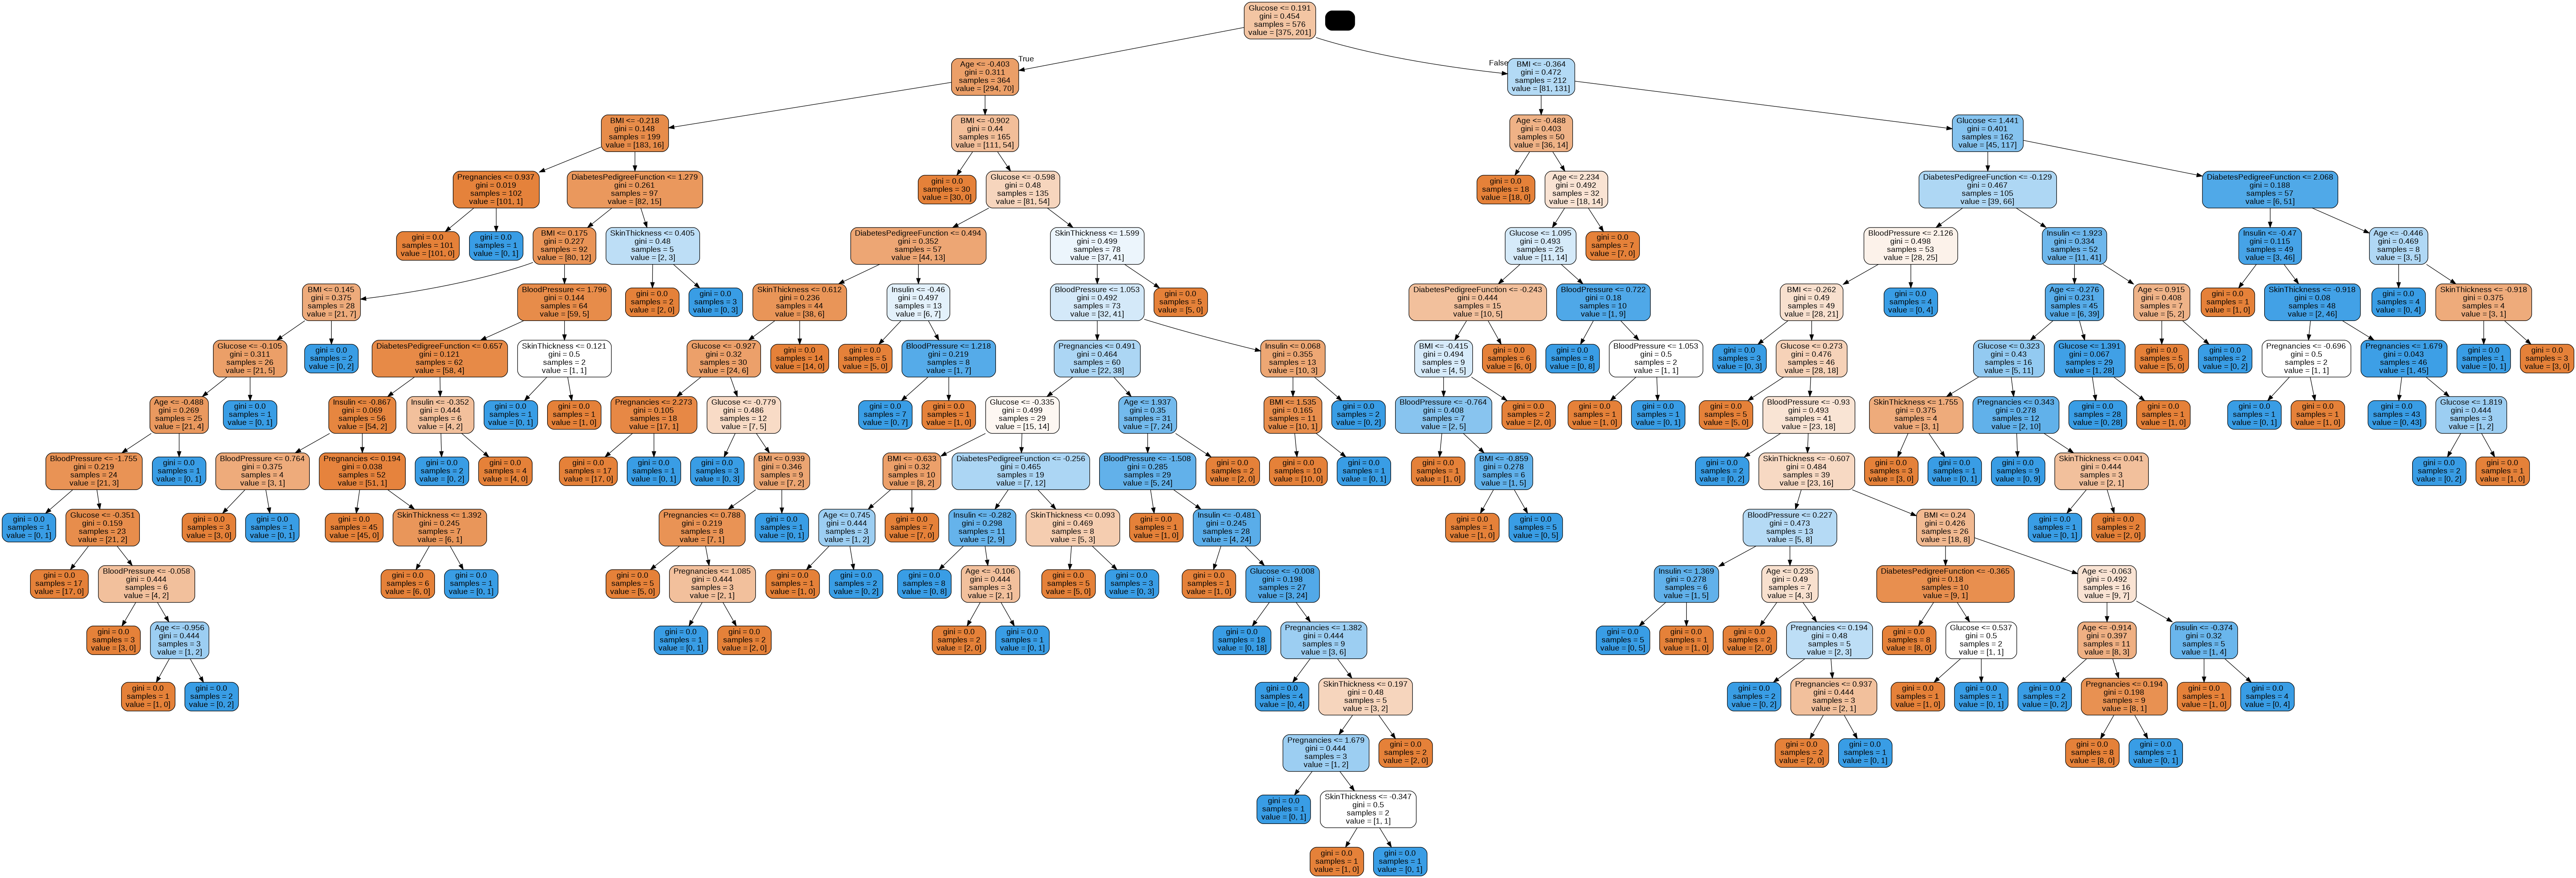

In [ ]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [78]:
clf.score(x_train,y_train)

1.0

In [79]:
y_pred3 = clf.predict(x_test)

In [80]:
# accuracy of our classification tree
clf.score(x_test,y_test3)

0.7083333333333334

### Principal Component Analysis

Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.

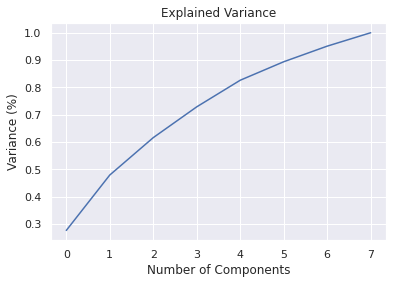

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 95% of the variance is being explained by 6 components. So instead of giving all 7 columns as input in our algorithm let's use these 6 principal components instead.

In [81]:
pca = PCA(n_components=6)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

In [82]:
principal_x

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6
0    1.409153 -0.733975  0.053541  0.614705 -0.435278 -0.807059
1   -1.485388  0.281229 -0.406849  0.088242 -0.321995  0.438592
2    0.088633 -1.033262  1.854121  0.328091  0.037134 -1.476451
3   -1.935771  0.493247 -0.381190 -0.622154 -0.104683  0.373818
4    1.197622  3.533308  2.026670  4.631353 -0.316275 -1.156047
..        ...       ...       ...       ...       ...       ...
763  2.121807 -1.654865 -0.871616 -0.106181 -2.356026  0.987879
764 -0.323188  0.623834 -0.601635 -0.360801  0.118603 -0.507596
765 -0.718414 -0.636942  0.262775 -0.550638 -0.104215  0.128329
766 -0.728878 -0.462984  0.577868 -0.112790 -0.113124 -0.756058
767 -1.190657  0.791529 -0.817426 -0.212316 -0.101238  0.290239

[768 rows x 6 columns]

In [88]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test3 = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#First, let's visualise the tree on the data without any pre-processing.
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test3)

0.670995670995671

In [89]:
y_pred3 = clf.predict(x_test)
y_pred3

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       152
           1       0.52      0.47      0.49        79

    accuracy                           0.67       231
   macro avg       0.63      0.62      0.62       231
weighted avg       0.66      0.67      0.67       231



After performing PCA score decreased a little bit since we did not used all the data. Lets try tuning in the hyperparameters and see if there is any increase in performance.

### Hyperparameter Tuning

In [ ]:
# We are now adjusting three hyperparameters and passing different values for both parameters.
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [ ]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 9, 'min_samples_split': 7, 'splitter': 'random'}


In [ ]:
grid_search.best_score_

0.7710280373831775

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =17, min_samples_leaf= 9, min_samples_split= 7, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=9,
                       min_samples_split=7, splitter='random')

In [ ]:
clf.score(x_test,y_test3)

0.7229437229437229

In [ ]:
y_pred3 = clf.predict(x_test)
y_pred3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])

In [ ]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       152
           1       0.60      0.57      0.58        79

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



Score has now increased to 72% after hyperparameter tuning which is good, since hyperparameter tuning takes several tries, a better score can be achieved. 

In [ ]:
conf_mat = confusion_matrix(y_test3,y_pred3)
conf_mat

array([[122,  30],
       [ 34,  45]])

Text(0.5, 12.5, 'Predicted label')

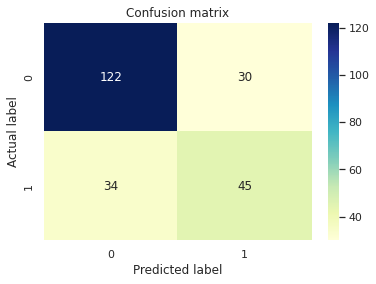

In [73]:
cnf_matrix = metrics.confusion_matrix(y_test3, y_pred3)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

1- diabetes (positive) , 0- no diabetes (negative)
<br>

122 people have diabetes and model predicted correctly
<br>

30 people have diabetes and model predicted incorrectly ( Type 1 error)
<br>

34 people dont have a diabetes and model predicted incorrectly (Type 2 Error)
<br>

45 people dont have a diabetes and model predicted correctly

In [ ]:
auc_score3 = roc_auc_score(y_test3, y_pred3)
print(auc_score3)

0.6861259160559626


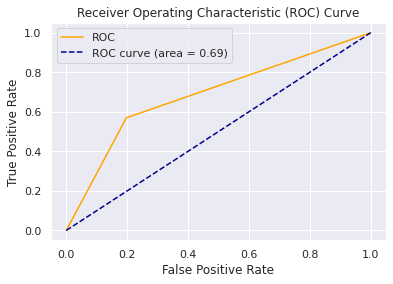

In [74]:
fpr, tpr, thresholds = roc_curve(y_test3, y_pred3)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_score3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from statistics import mean

#### k-fold cross validation 


for k =  1
train_score is :   0.7982954545454546 and test score is :   0.75
for k =  2
train_score is :   0.796875 and test score is :   0.796875
for k =  3
train_score is :   0.7940340909090909 and test score is :   0.734375
for k =  4
train_score is :   0.7897727272727273 and test score is :   0.75
for k =  5
train_score is :   0.7855113636363636 and test score is :   0.765625
for k =  6
train_score is :   0.7798295454545454 and test score is :   0.75
for k =  7
train_score is :   0.8039772727272727 and test score is :   0.734375
for k =  8
train_score is :   0.7826704545454546 and test score is :   0.703125
for k =  9
train_score is :   0.7911931818181818 and test score is :   0.78125
for k =  10
train_score is :   0.7826704545454546 and test score is :   0.71875
for k =  11
train_score is :   0.8053977272727273 and test score is :   0.71875
for k =  12
train_score is :   0.7982954545454546 and test score is :   0.71875
************************************************
**************

([<matplotlib.axis.YTick at 0x7f7b96f20850>,
 <a list of 7 Text major ticklabel objects>)

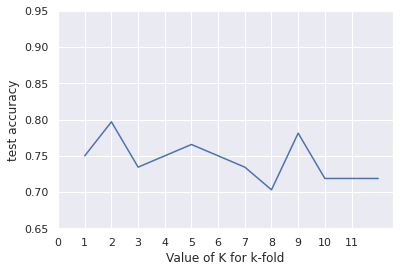

In [ ]:
kfold = KFold(n_splits=12,random_state= 42, shuffle = True)
kfold.get_n_splits(X_scaled)

clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =17, min_samples_leaf= 9, min_samples_split= 7, splitter ='random')
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    clf.fit(X_train,y_train)
    train_score_ = clf.score(X_train,y_train)
    test_score_ =  clf.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05))


"""Average train score is : 0.7923768939393939
Average test score is : 0.7434895833333334

According to cross validation, on average the model has a 74 percent accuracy on test data. As a result, we can utilise cross validation to determine how well our model generalises to our data.